# ***Análise de dados com Python e Pandas*** - *Vinicius Garcia*

### Neste projeto, trouxe a análise do cadastro de clientes da empresa e o relatório, que fiz recentemente para o diretor, na ocasião executei as tarefas todas no MS Excel e dessa vez, vou aplicar o conhecimento adquirido em Python e Pandas nos treinamentos da DIO.

In [1]:
#Após a substituição dos dados reais, vou importae as bibliotecas e mudar o estilo do marplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#gerar números aleatórios para substituir a coluna de CNPJ e letras aleatórias para substituir o campo Razão Social, pensando na proteção dos dados.
import random, string, xlwt
from tempfile import TemporaryFile

listaCNPJ = []
listaRazaoSocial = []
letras = string.ascii_uppercase + ' '

for num in range(5027):
    rnd = random.SystemRandom()
    listaCNPJ.append(''.join(rnd.choice(string.digits) for i in range(14)))
    listaRazaoSocial.append(''.join(rnd.choice(letras) for i in range(20)))

book = xlwt.Workbook()
sheet1 = book.add_sheet('CNPJ')
for i,e in enumerate(listaCNPJ):
    sheet1.write(i,0,e)

sheet2 = book.add_sheet('Razao_Social')
for i,e in enumerate(listaRazaoSocial):
    sheet2.write(i,1,e)

name = "trocaDados.xls"
book.save(name)
book.save(TemporaryFile())


In [3]:
#importar o cadastro de Clientes para o dfclientes
dfclientes = pd.read_excel("clientes.xlsx")

In [5]:
#importar o a data dos úmltimos pedidos por cliente em dfpedidos
dfpedidos = pd.read_excel("pedidos.xlsx")

In [6]:
#Visualizando as 5 primeiras linhas dos clientes
dfclientes.head()

,IDClienteERP,CNPJ,Razao,UF,Vendedor
0,4878749,27143530107091,SUQDZO BYIEICISJPQES,ES,Vendedor1
1,4878752,90005866086857,LCSNMZSBHYLYQTCALLCD,SP,Vendedor1
2,4880249,226698437158,USWEGSSAKVLOJQXNRDXW,BA,Vendedor1
3,4880252,21804167262495,C FWLIRDTZDITYEEGPDJ,PR,Vendedor1
4,4880257,6540162031292,ZSDFSUFHUHORSBUMBCGY,RN,Vendedor1


In [7]:
#Visualizando as 5 primeiras linhas dos pedidos
dfpedidos.head()

,IDClienteERP,dtEntregaUltimoPedido
0,4881483,2022-07-06
1,4885244,2022-06-15
2,4885139,2022-05-05
3,4880501,2022-04-11
4,5801737,2022-02-25


### Neste relatório solicitado, o objeto é avaliar como está a carteira de clientes após a pandemia do COVID-19, a empresa perdeu alguns vendedores, sendo necessário avaliar quantos clientes estão *sem vendedor* e dos clientes com vendedor, quantos estão *ativos* (com pedidos nos últimos 6 meses), quantos estão em *atenção* (sem pedido nos últimos 6 meses) e quantos estão *inativos* (sem pedido) 

In [8]:
#Quantidade de linhas e colunas dos clientes
dfclientes.shape

(5027, 5)

In [81]:
#Quantidade de linhas e colunas dos pedidos
dfpedidos.shape

(855, 2)

Com o shape já é possível avaliar que a quantidade de clientes com pedido é muito baixa

In [82]:
#vamos verificar o tipo de dados de cada DataFrame para juntar os dois
dfclientes.dtypes

IDClienteERP     int64
CNPJ             int64
Razao           object
UF              object
Vendedor        object
dtype: object

In [84]:
dfpedidos.dtypes

IDClienteERP                      int64
dtEntregaUltimoPedido    datetime64[ns]
dtype: object

In [85]:
#IDCliente tem o mesmo tipo de dados nos dois DataFrame, vamos fazer o merge entre eles mantendo todos os registro dos clientes mesmo sem compra
dfanalise = dfclientes.merge(dfpedidos, how='left')

In [86]:
#verificar se manteve a quantidade do dfclientes
dfanalise.shape

(5027, 6)

In [87]:
dfanalise.sample(20)

,IDClienteERP,CNPJ,Razao,UF,Vendedor,dtEntregaUltimoPedido
2955,4883106,69918078797304,KBGGMY AAUNFLCNEZPVT,BA,NaN,NaT
4675,4884111,90460068822173,ELRYKEQDOGPOOWKKL MT,CE,NaN,NaT
4673,4884101,88753912900776,OZRBLWOGLZBDZZWZDKNE,CE,NaN,NaT
3254,4884153,59149984335247,GTLSDS WGTVC F YZILF,MG,NaN,NaT
3183,4883908,83839072831655,YRAUO PIBJDIFHMFCFWJ,MT,NaN,NaT
4768,4884461,45249555442878,IRYDHOIARDBDSQSDOZFG,BA,NaN,NaT
1569,4883354,86468277176568,WTXFABGKMUNVQSCUVYDX,PA,Vendedor5,NaT
4135,4881870,35094784946985,DFZRWGJJFXEMQPGXHRRK,SP,NaN,NaT
503,4881336,9511156216693,QDPOOLJKEBLD SFSEVLZ,RJ,Vendedor2,NaT
4894,4885273,58615422532357,CSCFQTHRETLHZNUCYIFV,MG,NaN,NaT


In [88]:
#verificar se o campo dtEntregaUltimoPedido está como data para usar como filtro
dfanalise.dtypes

IDClienteERP                      int64
CNPJ                              int64
Razao                            object
UF                               object
Vendedor                         object
dtEntregaUltimoPedido    datetime64[ns]
dtype: object

In [89]:
#verificar total de clientes sem vendedor e total de clientes inativos
dfanalise.isnull().sum()

IDClienteERP                0
CNPJ                        0
Razao                       0
UF                          0
Vendedor                 2958
dtEntregaUltimoPedido    4176
dtype: int64

In [104]:
#levantando os totais de clientes, com e sem vendedor
totalClientes = dfanalise["CNPJ"].count()
totalClientesComVendedor = dfanalise['Vendedor'].count()
totalClientesSemVendedor = dfanalise['Vendedor'].isnull().sum()

<BarContainer object of 2 artists>

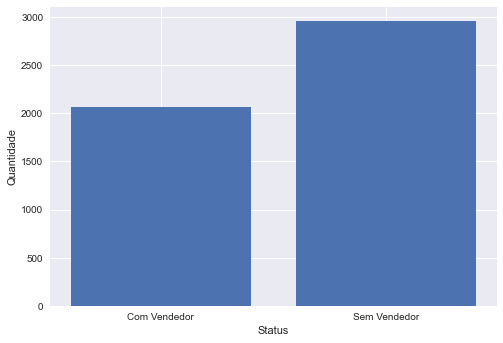

In [120]:
#Responder a pergunta de quantos clientes estão com vendedor e quantos estão sem vendedor
rotulos = ['Com Vendedor', 'Sem Vendedor']
valores = [totalClientesComVendedor, totalClientesSemVendedor]
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.bar(rotulos, valores)


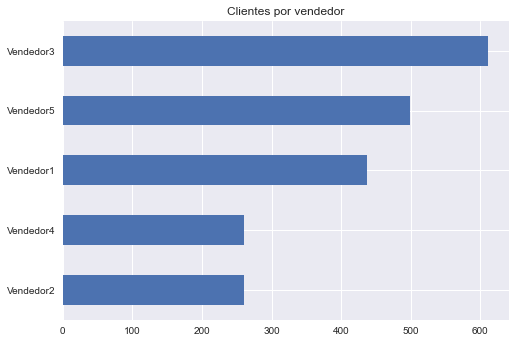

In [116]:
#analisar quantos clientes tem cada vendedor
dfanalise["Vendedor"].value_counts(ascending=True).plot.barh(title='Clientes por vendedor');

In [103]:
#conferindo
print(totalClientesComVendedor)
print(totalClientesSemVendedor)

2069
2958


In [106]:
#criar uma coluna de status (ativo, atenção e inativo) para gerar os gráficos
dfanalise['status'] = np.where(dfanalise.dtEntregaUltimoPedido >= '2021/05/01', 'Ativo', np.where(dfanalise.dtEntregaUltimoPedido < '2021/05/01', 'Atenção', 'Inativo'))

In [108]:
dfanalise.sample(10)

,IDClienteERP,CNPJ,Razao,UF,Vendedor,dtEntregaUltimoPedido,status
3104,4883611,57106335508624,L KQXQDXK VOTLGVLKHC,MA,NaN,NaT,Inativo
135,4883551,60127592490499,R JB XCZQMOPFWMELUKY,SP,Vendedor1,2021-10-17,Ativo
104,4882340,42897993377876,OIBPQMNPFRKFGIRSTLHN,PE,Vendedor1,2020-10-23,Atenção
186,4885011,97758057721318,E XCGNGJGLLDTY PRYW,MS,Vendedor1,2021-10-02,Ativo
4041,4881565,2410284041008,XJYJPTRAZEJNLJYXDBOI,SP,NaN,NaT,Inativo
4192,4882027,21045164482935,BLSNTP ABGWRCMOHPEWF,SP,NaN,NaT,Inativo
783,4881506,77305830417384,FEQMPSIBVEZHEQMQOQX,SP,Vendedor3,NaT,Inativo
3234,4884058,24507160699170,LETVFUAKLTLBHJAGREVB,BA,NaN,NaT,Inativo
3416,4885448,53722863502811,BNXTTGNDUIPTRBQAYVFL,PE,NaN,NaT,Inativo
4520,4883533,83637257642745,VTXMUCDLASFCQUVNUTQF,MG,NaN,NaT,Inativo


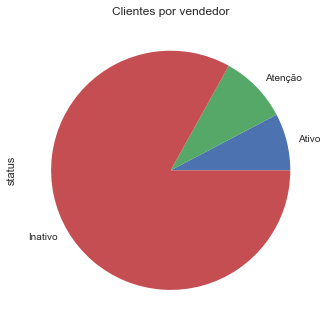

In [122]:
#totais de clientes por status
dfanalise["status"].value_counts(ascending=True).plot.pie(title='Status dos Clientes');

In [ ]:
#totais de clientes por status
dfanalise["status"].value_counts(ascending=True).plot.pie(title='Status dos Clientes');

In [154]:
#criar DataFrame dropando as linhas sem valor 
dfvendedores = dfanalise
dfvendedores.dropna(subset=["Vendedor"], inplace=True)

In [155]:
dfvendedores.isnull().sum()

IDClienteERP                0
CNPJ                        0
Razao                       0
UF                          0
Vendedor                    0
dtEntregaUltimoPedido    1259
status                      0
dtype: int64

<AxesSubplot:title={'center':'Clientes por status com vendedores'}, ylabel='Vendedor'>

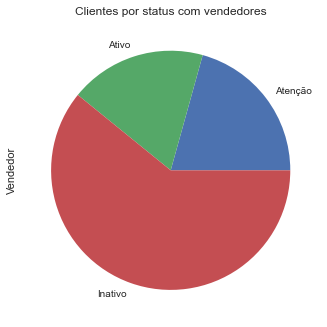

In [164]:
#totais de clientes com vendedores por status
dfvendedores.groupby('status')['Vendedor'].count().plot.pie(title='Clientes por status com vendedores')

In [182]:
#Criar gráfico analisando o status dos clientes de cada vendedor
vend1 = []
vend2 = []
vend3 = []
vend4 = []
vend5 = []
filtroAtivo = dfvendedores.status == 'Ativo'
filtroAtencao = dfvendedores.status == 'Atenção'
filtroInativo = dfvendedores.status == 'Inativo'

In [183]:
filtro = dfvendedores.Vendedor == 'Vendedor1'
vend1.append(dfvendedores.loc[filtro & filtroAtivo]['CNPJ'].count())
vend1.append(dfvendedores.loc[filtro & filtroAtencao]['CNPJ'].count())
vend1.append(dfvendedores.loc[filtro & filtroInativo]['CNPJ'].count())
filtro = dfvendedores.Vendedor == 'Vendedor2'
vend2.append(dfvendedores.loc[filtro & filtroAtivo]['CNPJ'].count())
vend2.append(dfvendedores.loc[filtro & filtroAtencao]['CNPJ'].count())
vend2.append(dfvendedores.loc[filtro & filtroInativo]['CNPJ'].count())
filtro = dfvendedores.Vendedor == 'Vendedor3'
vend3.append(dfvendedores.loc[filtro & filtroAtivo]['CNPJ'].count())
vend3.append(dfvendedores.loc[filtro & filtroAtencao]['CNPJ'].count())
vend3.append(dfvendedores.loc[filtro & filtroInativo]['CNPJ'].count())
filtro = dfvendedores.Vendedor == 'Vendedor4'
vend4.append(dfvendedores.loc[filtro & filtroAtivo]['CNPJ'].count())
vend4.append(dfvendedores.loc[filtro & filtroAtencao]['CNPJ'].count())
vend4.append(dfvendedores.loc[filtro & filtroInativo]['CNPJ'].count())
filtro = dfvendedores.Vendedor == 'Vendedor5'
vend5.append(dfvendedores.loc[filtro & filtroAtivo]['CNPJ'].count())
vend5.append(dfvendedores.loc[filtro & filtroAtencao]['CNPJ'].count())
vend5.append(dfvendedores.loc[filtro & filtroInativo]['CNPJ'].count())

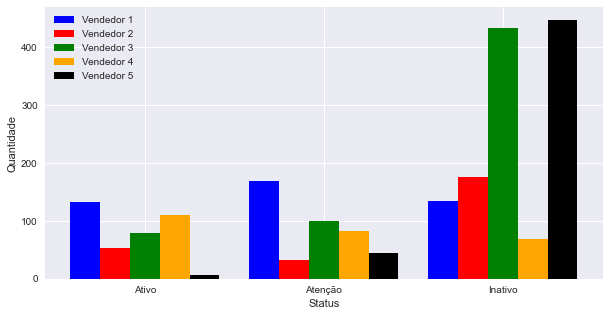

In [212]:
#gráfico comparando o status dos clientes em cada vendedor
barWidth = 0.25
plt.figure(figsize=(10,5))
r1 = [0, 1.5, 3]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, vend1, color='blue', width=barWidth, label='Vendedor 1')
plt.bar(r2, vend2, color='red', width=barWidth, label='Vendedor 2')
plt.bar(r3, vend3, color='green', width=barWidth, label='Vendedor 3')
plt.bar(r4, vend4, color='orange', width=barWidth, label='Vendedor 4')
plt.bar(r5, vend5, color='black', width=barWidth, label='Vendedor 5')

plt.xlabel('Status')
plt.xticks([0.5, 2, 3.5], ['Ativo','Atenção','Inativo'])
plt.ylabel('Quantidade')

plt.legend()
plt.show()

<AxesSubplot:title={'center':'Status dos clientes - Vendedor 1'}, ylabel='Vendedor'>

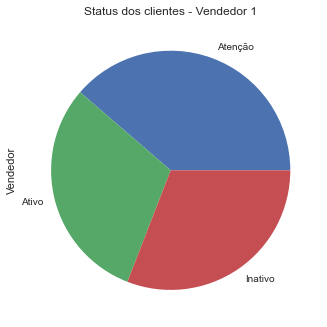

In [218]:
#Status dos clientes por vendedor
dfvendedor = dfvendedores.loc[dfvendedores.Vendedor == 'Vendedor1']
dfvendedor.groupby('status')['Vendedor'].count().plot.pie(title='Status dos clientes - Vendedor 1')

<AxesSubplot:title={'center':'Status dos clientes - Vendedor 2'}, ylabel='Vendedor'>

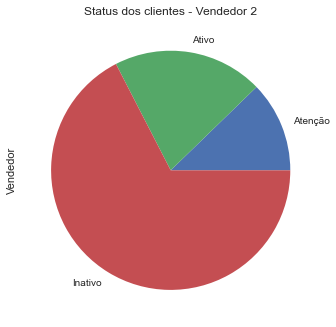

In [219]:
#Status dos clientes por vendedor
dfvendedor = dfvendedores.loc[dfvendedores.Vendedor == 'Vendedor2']
dfvendedor.groupby('status')['Vendedor'].count().plot.pie(title='Status dos clientes - Vendedor 2')

<AxesSubplot:title={'center':'Status dos clientes - Vendedor 3'}, ylabel='Vendedor'>

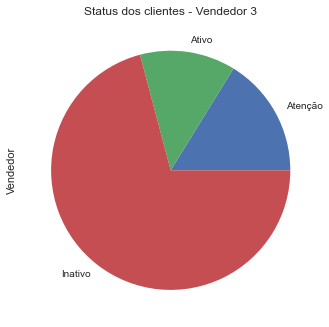

In [220]:
#Status dos clientes por vendedor
dfvendedor = dfvendedores.loc[dfvendedores.Vendedor == 'Vendedor3']
dfvendedor.groupby('status')['Vendedor'].count().plot.pie(title='Status dos clientes - Vendedor 3')

<AxesSubplot:title={'center':'Status dos clientes - Vendedor 4'}, ylabel='Vendedor'>

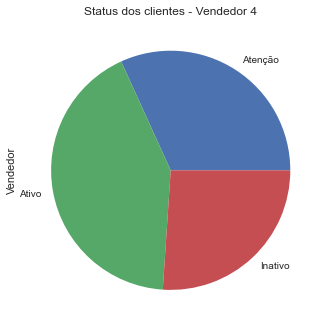

In [221]:
#Status dos clientes por vendedor
dfvendedor = dfvendedores.loc[dfvendedores.Vendedor == 'Vendedor4']
dfvendedor.groupby('status')['Vendedor'].count().plot.pie(title='Status dos clientes - Vendedor 4')

<AxesSubplot:title={'center':'Status dos clientes - Vendedor 5'}, ylabel='Vendedor'>

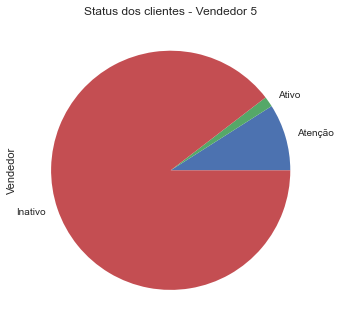

In [222]:
#Status dos clientes por vendedor
dfvendedor = dfvendedores.loc[dfvendedores.Vendedor == 'Vendedor5']
dfvendedor.groupby('status')['Vendedor'].count().plot.pie(title='Status dos clientes - Vendedor 5')